In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
cols = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
car = pd.read_csv('imports-85.data',names = cols)

In [3]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
nums_cars = car[['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']]
nums_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-ratio  205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.2+ KB


In [6]:
nums_cars = nums_cars.replace('?',np.nan)
nums_cars['normalized-losses'].isna()

0       True
1       True
2       True
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: normalized-losses, Length: 205, dtype: bool

In [7]:
nums_cars['normalized-losses'] = nums_cars['normalized-losses'].astype(float)
nums_cars['normalized-losses'] = nums_cars['normalized-losses'].fillna(nums_cars['normalized-losses'].mean())

In [8]:
ls = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
for i in ls:
    print(f'{i}:{nums_cars[i].isna().value_counts()}')
    print()

normalized-losses:normalized-losses
False    205
Name: count, dtype: int64

wheel-base:wheel-base
False    205
Name: count, dtype: int64

length:length
False    205
Name: count, dtype: int64

width:width
False    205
Name: count, dtype: int64

height:height
False    205
Name: count, dtype: int64

curb-weight:curb-weight
False    205
Name: count, dtype: int64

engine-size:engine-size
False    205
Name: count, dtype: int64

bore:bore
False    201
True       4
Name: count, dtype: int64

stroke:stroke
False    201
True       4
Name: count, dtype: int64

compression-ratio:compression-ratio
False    205
Name: count, dtype: int64

horsepower:horsepower
False    203
True       2
Name: count, dtype: int64

peak-rpm:peak-rpm
False    203
True       2
Name: count, dtype: int64

city-mpg:city-mpg
False    205
Name: count, dtype: int64

highway-mpg:highway-mpg
False    205
Name: count, dtype: int64

price:price
False    201
True       4
Name: count, dtype: int64



In [9]:
ls = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']
for i in ls:
    nums_cars[i] = nums_cars[i].fillna(0)
nums_cars.isna().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [10]:
nums_cars =nums_cars.dropna(subset = ['price'])

In [11]:
nums_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
nums_cars['bore'] = nums_cars['bore'].astype(float)

In [13]:
nums_cars[['horsepower','peak-rpm','price','stroke']] = nums_cars[['horsepower','peak-rpm','price','stroke']].astype(float)

In [14]:
nums_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    int64  
 6   engine-size        201 non-null    int64  
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-ratio  201 non-null    float64
 10  horsepower         201 non-null    float64
 11  peak-rpm           201 non-null    float64
 12  city-mpg           201 non-null    int64  
 13  highway-mpg        201 non-null    int64  
 14  price              201 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 25.1 KB


## normalisations des donnés

In [15]:
normalized_data = (nums_cars - nums_cars.max())/(nums_cars.max()-nums_cars.min())
normalized_data['price'] = nums_cars['price']

In [16]:
normalized_data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-0.701571,-0.941691,-0.586567,-0.675214,-0.916667,-0.588829,-0.739623,-0.119289,-0.357314,-0.8750,-0.576336,-0.242424,-0.777778,-0.710526,13495.0
1,-0.701571,-0.941691,-0.586567,-0.675214,-0.916667,-0.588829,-0.739623,-0.119289,-0.357314,-0.8750,-0.576336,-0.242424,-0.777778,-0.710526,16500.0
2,-0.701571,-0.769679,-0.550746,-0.555556,-0.616667,-0.482157,-0.656604,-0.319797,-0.167866,-0.8750,-0.412214,-0.242424,-0.833333,-0.736842,16500.0
3,-0.481675,-0.615160,-0.470149,-0.495726,-0.458333,-0.670675,-0.818868,-0.190355,-0.184652,-0.8125,-0.610687,-0.166667,-0.694444,-0.631579,13950.0
4,-0.481675,-0.626822,-0.470149,-0.478632,-0.458333,-0.481769,-0.716981,-0.190355,-0.184652,-0.9375,-0.561069,-0.166667,-0.861111,-0.842105,17450.0


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## model univarié correction

In [27]:
def knn_train_test(train_col,target_col,df):
    knn = KNeighborsRegressor()
    np.random.seed(0)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df)/2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn.fit(train_df[[train_col]],train_df[target_col])
    
    predicted_labels = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[target_col],predicted_labels)
    rmse = np.sqrt(mse)
    
    return rmse

In [28]:
rmse_results = {}
train_cols = normalized_data.columns.drop('price')

for i in train_cols:
    rmse_val = knn_train_test(i,'price',normalized_data)
    rmse_results[i] = rmse_val
    
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3197.380649
curb-weight          3782.628466
highway-mpg          3839.628896
width                4078.311863
horsepower           4994.403147
city-mpg             5009.665270
length               5785.126519
compression-ratio    6033.660881
wheel-base           6197.493839
bore                 6433.303844
normalized-losses    6964.389907
peak-rpm             7078.261413
stroke               7139.640139
height               7502.274571
dtype: float64

In [22]:
def knn_train_test2(train_col,target_col,df):
    np.random.seed(0)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df)/2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmse ={}
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(train_df[[train_col]],train_df[target_col])
    
        predicted_labels = knn.predict(test_df[[train_col]])
    
        mse = mean_squared_error(test_df[target_col],predicted_labels)
        rmse = np.sqrt(mse)
        k_rmse[i] = rmse
    
    return k_rmse

In [23]:
knn_train_test2('normalized-losses','price',normalized_data)

{1: 6023.142449776282,
 3: 6596.095787097338,
 5: 6964.389906965119,
 7: 7060.025543715456,
 9: 7296.458564564243}

In [24]:
feature_k_rmse_results = {}
train_cols = normalized_data.columns.drop('price')

for i in train_cols:
    rmse_val = knn_train_test2(i,'price',normalized_data)
    feature_k_rmse_results[i] = rmse_val

feature_k_rmse_results

{'normalized-losses': {1: 6023.142449776282,
  3: 6596.095787097338,
  5: 6964.389906965119,
  7: 7060.025543715456,
  9: 7296.458564564243},
 'wheel-base': {1: 6489.446552245842,
  3: 7526.560082425931,
  5: 6197.493838513746,
  7: 5534.048264952886,
  9: 5371.936991061691},
 'length': {1: 5363.785887738711,
  3: 5438.2915427816515,
  5: 5785.1265187907375,
  7: 5442.619127651736,
  9: 5356.326400972161},
 'width': {1: 4456.489321125648,
  3: 4015.0028779579975,
  5: 4078.3118626594646,
  7: 3978.6566142902107,
  9: 3933.7472008680693},
 'height': {1: 9795.267437809844,
  3: 7902.347858767551,
  5: 7502.274571339172,
  7: 7171.552687126489,
  9: 7329.516246646302},
 'curb-weight': {1: 5939.546599024222,
  3: 4281.965701582271,
  5: 3782.6284657760157,
  7: 3712.3355147583557,
  9: 4083.0391747693757},
 'engine-size': {1: 3129.2340014200863,
  3: 3499.6408959263294,
  5: 3197.3806488226182,
  7: 3413.2797624742902,
  9: 3702.127589084076},
 'bore': {1: 6082.780135613799,
  3: 6166.6950

normalized-losses
avarage_rmse:6788.022450423688
wheel-base
avarage_rmse:6223.897145840019
length
avarage_rmse:5477.229895586999
width
avarage_rmse:4092.4415753802778
height
avarage_rmse:7940.191760337871
curb-weight
avarage_rmse:4359.903091182048
engine-size
avarage_rmse:3388.3325795454803
bore
avarage_rmse:6385.224766577758
stroke
avarage_rmse:7139.6375727876
compression-ratio
avarage_rmse:6631.041661912686
horsepower
avarage_rmse:4807.12197378024
peak-rpm
avarage_rmse:7273.005698722543
city-mpg
avarage_rmse:4653.605862629963
highway-mpg
avarage_rmse:4181.54584466558


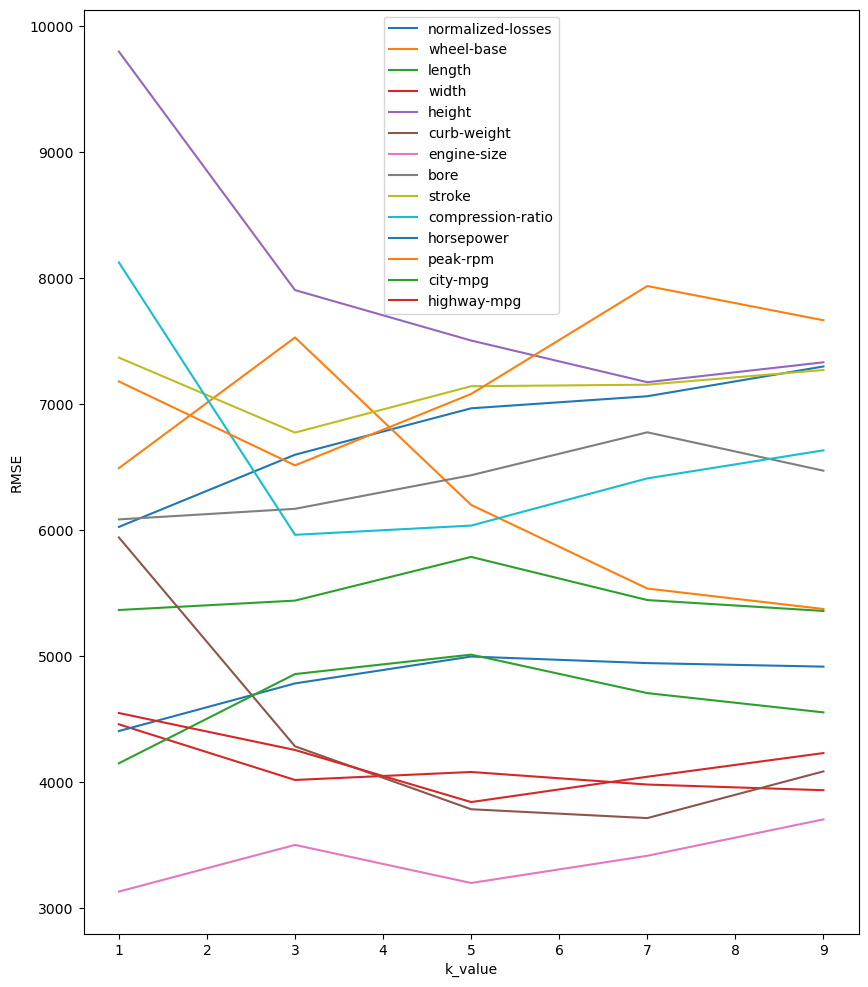

In [26]:
import matplotlib.pyplot as plt
best_features = {}

plt.figure(figsize=(10,12))

for key,value in feature_k_rmse_results.items():
    x=list(value.keys())
    y=list(value.values())
    
    order = np.argsort(x)
    x_orderded = np.array(x)[order]
    y_orderded = np.array(y)[order]
    print(key)
    print('avarage_rmse:' + str(np.mean(y)))
    best_features[key] = np.mean(y)
    
    plt.plot(x_orderded,y_orderded,label=key)
    plt.xlabel("k_value")
    plt.ylabel('RMSE')
plt.legend()
plt.show()

In [38]:
sorted_features_list= sorted(best_features, key = best_features.get)
sorted_features_list

['engine-size',
 'width',
 'highway-mpg',
 'curb-weight',
 'city-mpg',
 'horsepower',
 'length',
 'wheel-base',
 'bore',
 'compression-ratio',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height']

###  model multivarié

In [42]:
def knn_train_test3(train_col,target_col,df):
    np.random.seed(0)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df)/2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmse ={}
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(train_df[train_col],train_df[target_col])
    
        predicted_labels = knn.predict(test_df[train_col])
    
        mse = mean_squared_error(test_df[target_col],predicted_labels)
        rmse = np.sqrt(mse)
        k_rmse[i] = rmse
    
    return k_rmse

In [44]:
k_rmse_features={}
best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]
best_six_features = sorted_features_list[0:6]

k_rmse_features["best_two_features"]=knn_train_test3(best_two_features,'price',normalized_data)
k_rmse_features["best_three_features"]=knn_train_test3(best_three_features,'price',normalized_data)
k_rmse_features["best_four_features"]=knn_train_test3(best_four_features,'price',normalized_data)
k_rmse_features["best_five_features"]=knn_train_test3(best_five_features,'price',normalized_data)
k_rmse_features["best_six_features"]=knn_train_test3(best_six_features,'price',normalized_data)

k_rmse_features

{'best_two_features': {5: 3522.2919882225874},
 'best_three_features': {5: 3088.612295206216},
 'best_four_features': {5: 3273.331358323831},
 'best_five_features': {5: 3265.9332152897236},
 'best_six_features': {5: 3130.574786751715}}

### hyper parametre

In [45]:
def knn_train_test4(train_col,target_col,df):
    np.random.seed(0)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df)/2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1,25)]
    k_rmse ={}
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(train_df[train_col],train_df[target_col])
    
        predicted_labels = knn.predict(test_df[train_col])
    
        mse = mean_squared_error(test_df[target_col],predicted_labels)
        rmse = np.sqrt(mse)
        k_rmse[i] = rmse
    
    return k_rmse

In [48]:
k_rmse_results ={}
k_rmse_results["best_two_features"]=knn_train_test3(best_two_features,'price',normalized_data)
k_rmse_results["best_three_features"]=knn_train_test3(best_three_features,'price',normalized_data)
k_rmse_results["best_four_features"]=knn_train_test3(best_four_features,'price',normalized_data)

k_rmse_results

{'best_two_features': {1: 2739.1375458434914,
  2: 3017.720680242026,
  3: 3298.836799194948,
  4: 3453.0712595836153,
  5: 3522.2919882225874,
  6: 3661.093394535211,
  7: 3763.570763959725,
  8: 3952.7757156771218,
  9: 4078.9389834886106,
  10: 4118.48781057339,
  11: 4090.6541591634636,
  12: 4108.520961246139,
  13: 4072.773693396071,
  14: 4056.9214711148256,
  15: 4128.134098695157,
  16: 4123.277692798618,
  17: 4117.476979838813,
  18: 4076.2780870839065,
  19: 4069.143429639769,
  20: 4079.8521518087896,
  21: 4154.908944032182,
  22: 4203.738101706521,
  23: 4243.607339430457,
  24: 4261.682398126758},
 'best_three_features': {1: 2690.9489051078226,
  2: 2842.8309576829215,
  3: 3087.314315399099,
  4: 3208.34927309486,
  5: 3088.612295206216,
  6: 3281.509779700257,
  7: 3429.022402330433,
  8: 3636.015442735957,
  9: 3706.0476966720976,
  10: 3768.1255135204246,
  11: 3776.861307160254,
  12: 3772.863230354931,
  13: 3844.7155713059947,
  14: 3867.2961834150506,
  15: 3904

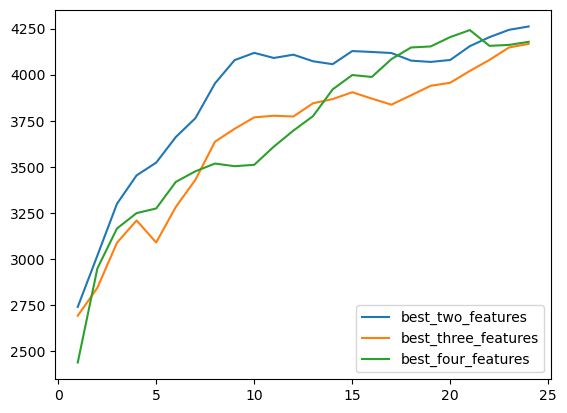

In [52]:
for i, j in k_rmse_results.items():
    x = list(j.keys())
    y = list(j.values())
    plt.plot(x,y,label =i)
plt.legend()
plt.show()